# Quantitive Economics, Midterm Exam 
## Spring 2024
### Fatemeh Abbasian-Abyaneh
### Student ID: 400100338

 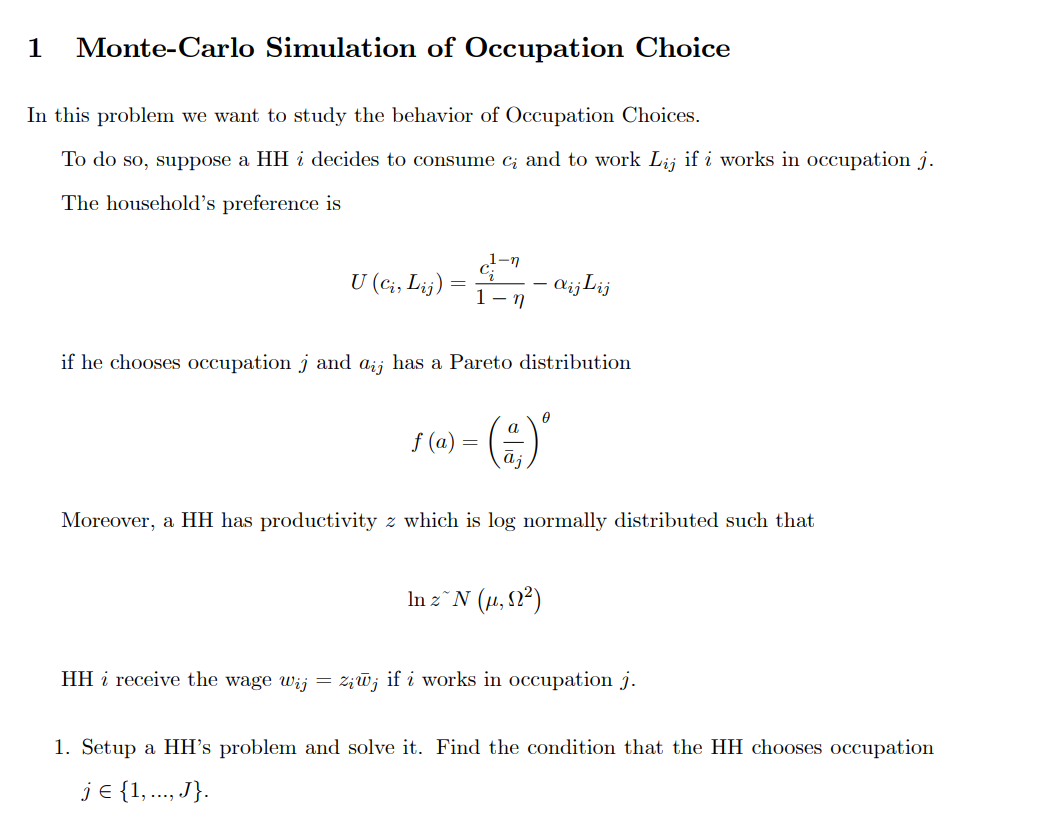

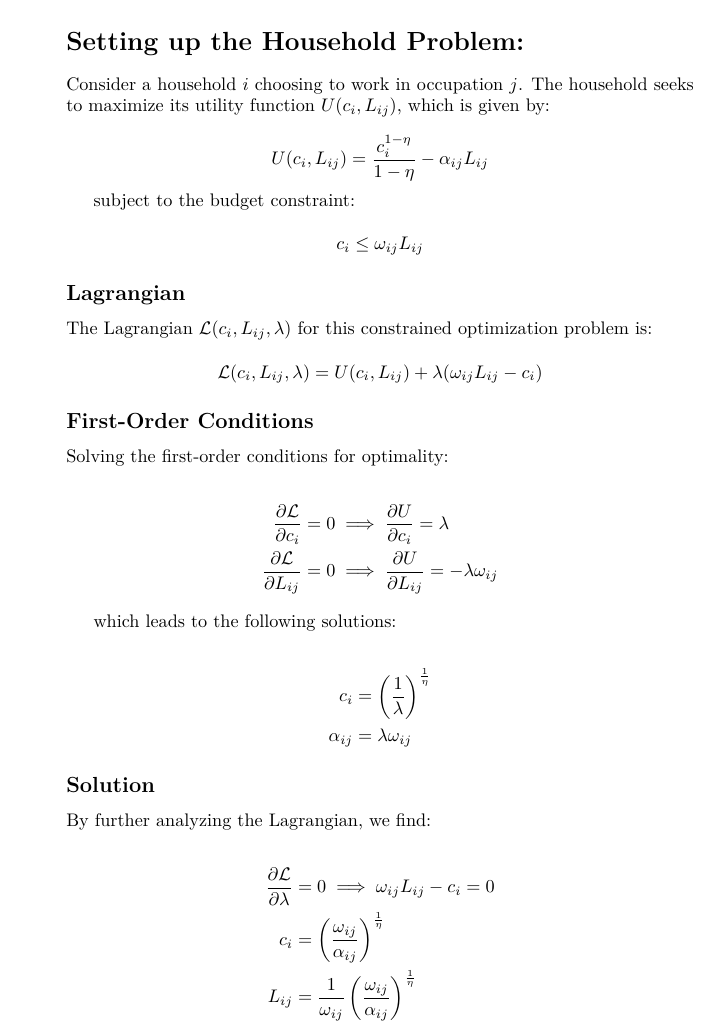

 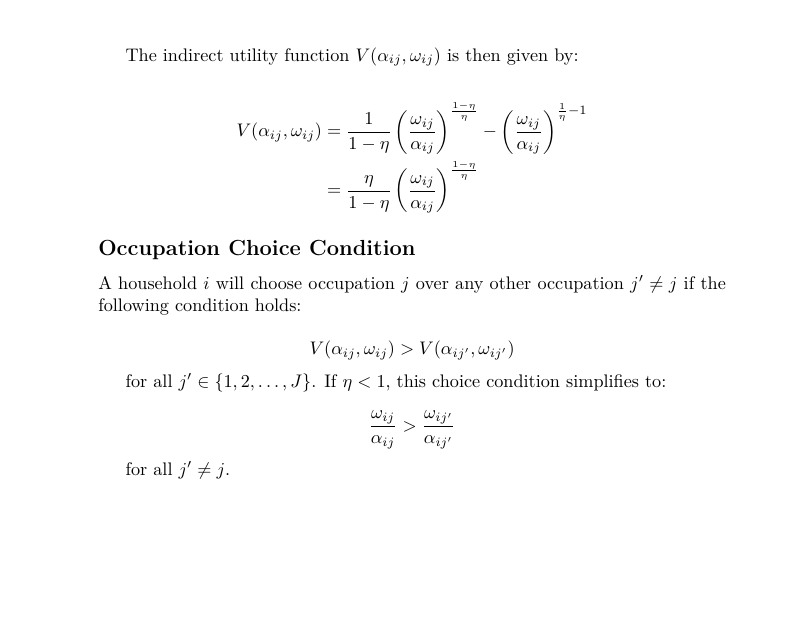

 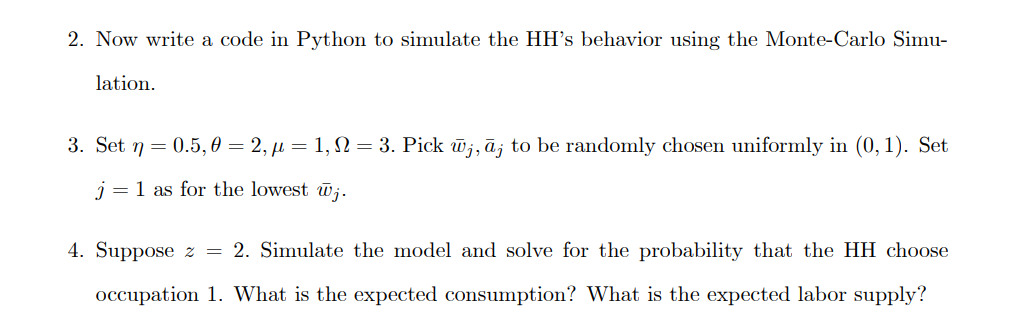

For the sake of simplicity I choose J = 2:

The condition to choose occupation \(j\) is:

$$
\frac {z_{i}w_{j}}{a_{ij}} > \frac {z_{i}w_{k}}{a_{ik}}
$$

$$
w_{j}{a_{ik}} > w_{k}{a_{ij}}
$$
where:
- \( z_i \) is the productivity of household \( i \)
- \( w_{j=1} \) is the wage for occupation \( j \)
- \( w_k \) is the wage for the other occupation \( k \)
- \( a_{ij} \) and \( a_{ik} \) are the preference parameters for occupations \( j \) and \( k \) respectively.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import minimize
import random

In [35]:
# Function to calculate consumption
def calculate_consumption(eta, w, z, a):
    return (w * z / a) ** (1 / eta)

# Function to calculate labor supply
def calculate_labor(c, w , z):
    return c / (w * z)


In [475]:
a_1 = np.random.uniform(0.2,1) ##avoing extreme values
a_2 = np.random.uniform(0.2,1)
w_1 = np.random.uniform(0,1)
w_2 = np.random.uniform(0,1)
if w_1 > w_2:
    w_1, w_2 = w_2, w_1
a_1, a_2, w_1, w_2

(0.368562613172897,
 0.22019956411906164,
 0.8778402652495207,
 0.9191530331161022)

In [476]:
N = 100000
eta = 0.5
theta = 2
mu = 1   
omega = 3 
z = 2

In [477]:
a_hh_1 = (np.random.pareto(theta, N) + 1) * a_1
a_hh_2 = (np.random.pareto(theta, N) + 1) * a_2

In [478]:
occup_hh = np.zeros(N)
labor_hh = np.zeros(N)
concumption_hh = np.zeros(N)

In [480]:
for i in range(N):
    if w_1 * a_hh_2[i] > w_2 * a_hh_1[i]:
        occup_hh[i] = 1
        concumption_hh[i] = calculate_consumption(eta,w_1, z, a_hh_1[i])
        labor_hh[i] =calculate_labor(concumption_hh[i], w_1, z)
    else:
        occup_hh[i] = 2
        concumption_hh[i] = calculate_consumption(eta, w_2, z, a_hh_2[i])
        labor_hh[i] = calculate_labor(concumption_hh[i], w_2, z)
        

In [481]:
probability_occup_1 = sum(occup_hh[i] == 1 for i in range(N)) / N
print(f"Expected HH choosing occupation j = 1: {probability_occup_1}")

Expected HH choosing occupation j = 1: 0.16361


In [482]:
expected_labor = np.mean(labor_hh)
expected_consumption = np.mean(concumption_hh)
print(f"Expected Labor: {expected_labor:.4f}")
print(f"Expected Consumption: {expected_consumption:.4f}")

Expected Labor: 19.6437
Expected Consumption: 35.9947


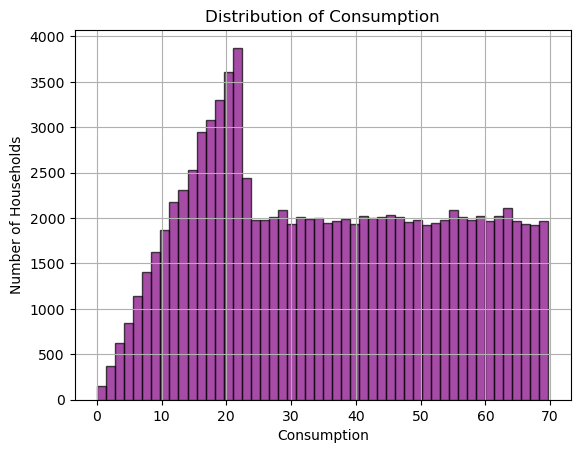

In [483]:
plt.hist( concumption_hh, bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Number of Households')
plt.grid(True)
plt.show()

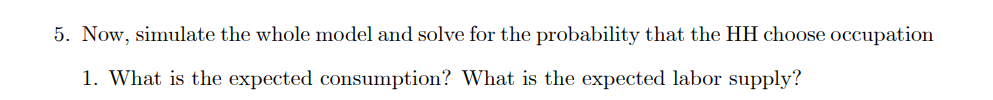

In [484]:
z = np.random.lognormal(mu, omega, N)

In [486]:
occup_hh2 = np.zeros(N)
labor_hh2 = np.zeros(N)
concumption_hh2 = np.zeros(N)

In [492]:
for i in range(N):
    if w_1 * a_hh_2[i] > w_2 * a_hh_1[i]:
        occup_hh2[i] = 1
        concumption_hh2[i] = calculate_consumption(eta,w_1, z[i], a_hh_1[i])
        labor_hh2[i] =calculate_labor(concumption_hh[i], w_1, z[i])
    else:
        occup_hh2[i] = 2
        concumption_hh2[i] = calculate_consumption(eta, w_2, z[i], a_hh_2[i])
        labor_hh2[i] = calculate_labor(concumption_hh2[i], w_2, z[i])
        

In [493]:
probability_occup2_1 = sum(occup_hh2[i] == 1 for i in range(N)) / N
print(f"Expected HH choosing occupation j = 1: {probability_occup2_1}")

Expected HH choosing occupation j = 1: 0.16361


In [494]:
expected_labor2 = np.mean(labor_hh2)
expected_consumption2 = np.mean(concumption_hh2)
print(f"Expected Labor: {expected_labor2:.4f}")
print(f"Expected Consumption: {expected_consumption2:.4f}")

Expected Labor: 2022.8899
Expected Consumption: 301119459.8589


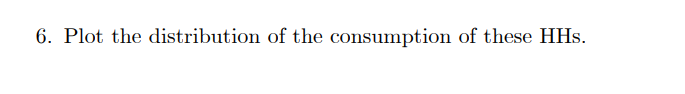

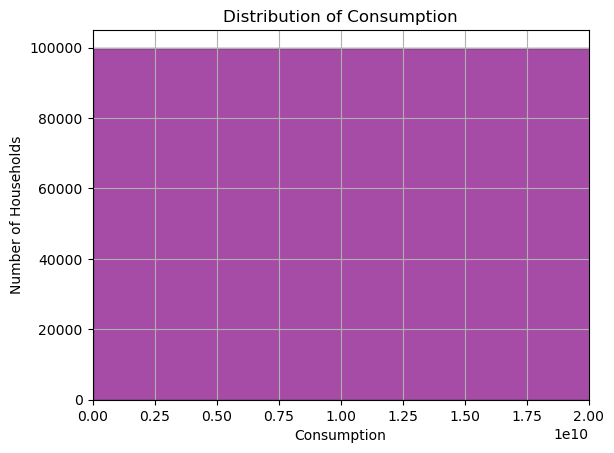

In [514]:
plt.hist(concumption_hh2, bins= 100, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Number of Households')
plt.xlim(1,0.2* 1e11)
plt.grid(True) 
plt.show()

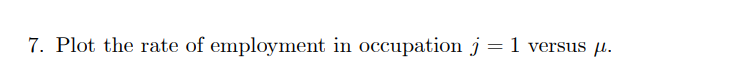

In [509]:
S = 50
employment_1 = np.zeros(S)
Mu = np.linspace(0.1,1,S)

In [511]:
for k, mu in enumerate(Mu):
    z = np.random.lognormal(mu, omega, N)
    occup_hh_mu = np.zeros(N)
     
    for i in range(N):
        if w_1 * a_hh_2[i] > w_2 * a_hh_1[i]:
            occup_hh_mu[i] = 1
             
        else:
            occup_hh_mu[i] = 2
             
        
    employment_1[k] =  sum(occup_hh_mu[i] == 1 for i in range(N)) / N

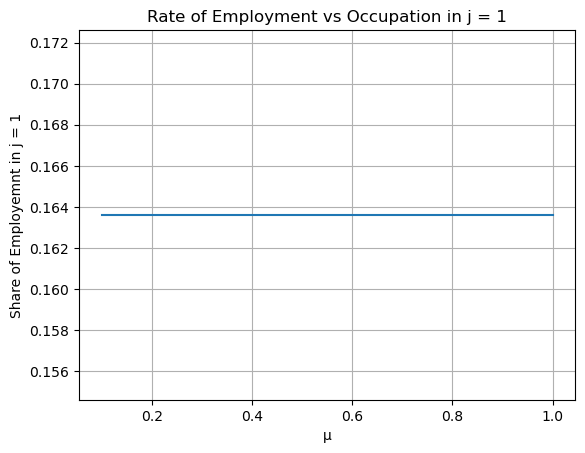

In [513]:
plt.plot(Mu,  employment_1)
plt.title('Rate of Employment vs Occupation in j = 1')
plt.xlabel('μ')
plt.ylabel('Share of Employemnt in j = 1')
plt.grid(True) 
plt.show()

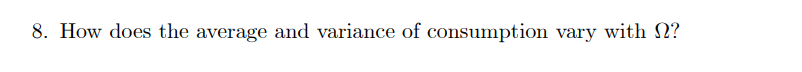

In [524]:
S2 = 50
mu = 0.2
consumption_mean = np.zeros(S2)
consumption_variance = np.zeros(S2)
Omega = np.linspace(0.1, 3,S2)

In [525]:
for k, Omega in enumerate(Mu):
    z = np.random.lognormal(mu, Omega, N)
    consumption_hh_omega = np.zeros(N)
     
    for i in range(N):
        if w_1 * a_hh_2[i] > w_2 * a_hh_1[i]:
            consumption_hh_omega[i] = calculate_consumption(eta,w_1, z[i], a_hh_1[i])
             
        else:
            consumption_hh_omega[i] = calculate_consumption(eta, w_2, z[i], a_hh_2[i])
            
             
    consumption_mean[k] = np.mean(consumption_hh_omega)
    consumption_variance[k] = np.std(consumption_hh_omega)
    

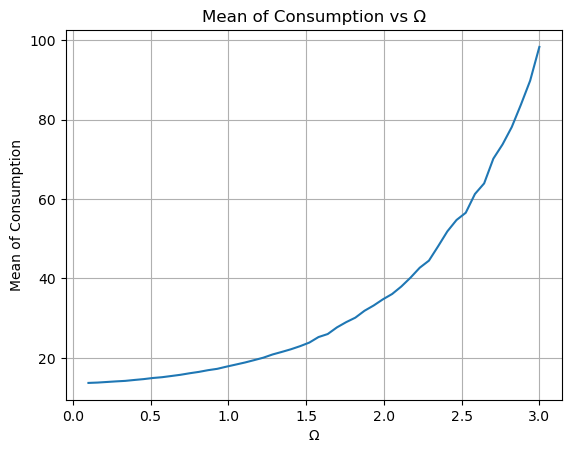

In [535]:
plt.plot(list(Omega), consumption_mean)
plt.title('Mean of Consumption vs Ω')
plt.xlabel('Ω')
plt.ylabel('Mean of Consumption')
plt.grid(True) 
plt.show()


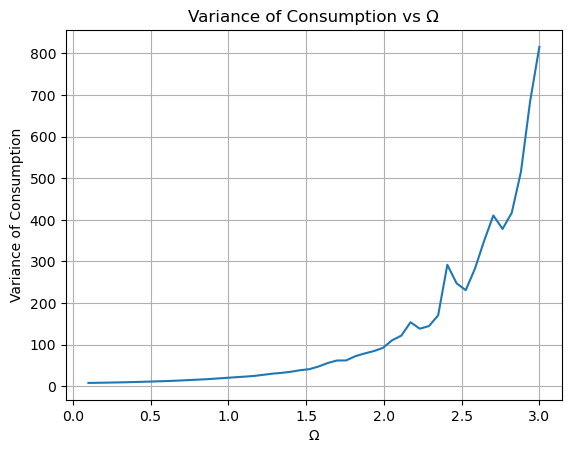

In [536]:
plt.plot(list(Omega), consumption_variance)
plt.title('Variance of Consumption vs Ω')
plt.xlabel('Ω')
plt.ylabel('Variance of Consumption')
plt.grid(True) 
plt.show()

The above distributions are of help to recognize what parameters can be estimated through the variation in our data. The rate of employemnt is only affected by $a_1$, $a_2$, $w_1$, and $w_2$, so it remain constant across varying $\mu$ and $\Omega$, since $z_{i}$ is constant for the houshold when making decision. On the other hand, According the the last figures, there is lots of variation in mean and variance of consumption across different parameters for household's productivity, namely z.

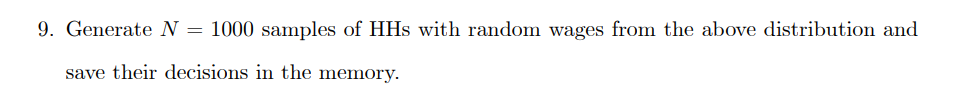

In [24]:
N = 1000 # numebr of households

In [26]:
a_1 = np.random.uniform(0.2,1) ##avoing extreme values
a_2 = np.random.uniform(0.2,1)
w_1 = np.random.uniform(0,1)
w_2 = np.random.uniform(0,1)
if w_1 > w_2:
    w_1, w_2 = w_2, w_1
a_1, a_2, w_1, w_2

(0.3861635875245461,
 0.9167437594844243,
 0.7716808530419542,
 0.9590568485149871)

In [45]:
eta = 0.5 # parameters that can be estimated
theta = 2
mu = 1   
omega = 3 

In [29]:
a_hh_1_gen = (np.random.pareto(theta, N) + 1) * a_1
a_hh_2_gen = (np.random.pareto(theta, N) + 1) * a_2

In [49]:
labor_hh_gen = np.zeros(N)
consumption_hh_gen = np.zeros(N)
wage_hh_gen = np.zeros(N) 
occup_hh_gen = np.zeros(N)
earning_hh_gen = np.zeros(N)

In [52]:
z = np.random.lognormal(mu, omega, N)

In [32]:
np.random.seed(1403)

In [53]:
for i in range(N):
    if w_1 * a_hh_2_gen[i] > w_2 * a_hh_1_gen[i]:
        occup_hh_gen[i] = 1
        consumption_hh_gen[i] = calculate_consumption(eta,w_1, z[i], a_hh_1_gen[i])
        labor_hh_gen[i] =calculate_labor(consumption_hh_gen[i], w_1, z[i])
        wage_hh_gen[i] = a_hh_1_gen[i] * z[i]
        earning_hh_gen[i] =   wage_hh_gen[i] *  labor_hh_gen[i]
    else:
        occup_hh_gen[i] = 2
        consumption_hh_gen[i] = calculate_consumption(eta,w_2, z[i], a_hh_2_gen[i])
        labor_hh_gen[i] = calculate_labor(consumption_hh_gen[i], w_2, z[i])
        wage_hh_gen[i] = a_hh_2_gen[i] * z[i]
        earning_hh_gen[i] =   wage_hh_gen[i] *  labor_hh_gen[i]
        

In [58]:
data_wage_mean = np.mean(wage_hh_gen)
data_wage_std = np.std(wage_hh_gen)

data_employment_in_1 = sum(occup_hh_gen[i] == 1 for i in range(N)) / N # first moment
data_wage_mean_occupation_1 = np.mean(wage_hh_gen[occup_hh_gen == 1]) # second moment
data_wage_mean_occupation_2 = np.mean(wage_hh_gen[occup_hh_gen == 2]) #.....
data_wage_std_occupation_1 = np.std(wage_hh_gen[occup_hh_gen == 1])
data_wage_std_occupation_2 = np.std(wage_hh_gen[occup_hh_gen == 2])
data_earning_mean = np.mean(earning_hh_gen)
data_earning_std = np.std(earning_hh_gen)
data_a_hh_1_min = min(a_hh_1_gen)
data_a_hh_2_min = min(a_hh_2_gen)
data_productivity_mean = np.mean(z)
data_productivity_std = np.std(z)

observed_moments = {
    #'share of employment in 1': data_employment_in_1,
    'wage mean in first occupation': data_wage_mean_occupation_1 ,
    #'wage mean in second occupation': data_wage_mean_occupation_2  ,
    'wage variance in first occupation': data_wage_std_occupation_1  ,
    #'wage variance in second occupation': data_wage_std_occupation_2  ,
    'earning mean': data_earning_mean,
    'earning variance': data_earning_std,
    'minimum prefernce for first occupation': data_a_hh_1_min,
    'minimum prefernce for second occupation': data_a_hh_2_min,
    'productivity mean': data_productivity_mean,
    'productivity variance': data_productivity_std,
}

for moment_name, moment_value in observed_moments.items():
    print(f"{moment_name}: {moment_value}")


wage mean in first occupation: 54.50411845549865
wage variance in first occupation: 354.5507568256859
earning mean: 7973092.008767418
earning variance: 200406210.5426101
minimum prefernce for first occupation: 0.38647395935888046
minimum prefernce for second occupation: 0.9168144153457138
productivity mean: 114.02111431488169
productivity variance: 727.2097388834312


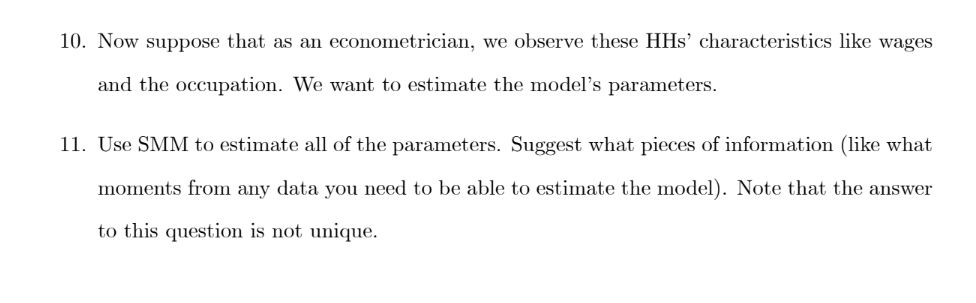

To estimate the parameters of the given econometric model using the Simulated Method of Moments (SMM), we would generally need to define moments from our data that correspond to the key features and relationships predicted by our model. The parameters to be estimated are θ, $\bar{a}_j$ (for each occupation j), $\bar{w}_j$ (wage parameters for each occupation), μ, Ω (parameters of the log-normal distribution for productivity z), and η.

Given the utility function and the distribution of $\alpha_{ij}$ and $z$ inthe model, suitable moments could include:

### Wage Moments:
- **Average Wage by Occupation:** This can help estimate $\bar{w}_j$. Since wages $w_{ij} = z_i \tilde{w}_j$ depend on the occupation-specific component $\tilde{w}_j$ and productivity $z_i$, the mean wage per occupation can provide information about the interaction between $\bar{w}_j$ and the average productivity.
- **Wage Dispersion within Each Occupation:** Given that productivity \(z\) is log-normally distributed, the variance in wages within each occupation can help estimate the variance parameter Ω.

### Productivity Moments:
- **Distribution of Productivity Estimates:** If one can estimate individual productivity \(z_i\) from wage data and occupation choice, one could use the moments of this estimated productivity distribution to fit μ and Ω.

### Choice of Occupation:
- **Proportion of Workers in Each Occupation:** The choice of occupation depends on the comparison of utility across occupations, which is affected by both $\alpha_{ij}$ and $\tilde{w}_j$. Hence, the observed distribution of workers across different occupations could inform the estimation of $\bar{a}_j$ and $\bar{w}_j$.

### Parameters of the Pareto Distribution (θ and $\bar{a}_j$):
- **Tail Index of the Distribution of $\alpha_{ij}$:** If one can observe or infer the distribution of $\alpha_{ij}$ from data (potentially from how wages relate to hours worked or utility derived), one could use the tail behavior of this distribution to estimate θ.
- **Minimum $\alpha_{ij}$ by Occupation:** Since $\bar{a}_j$ scales the Pareto distribution for each occupation, the minimum observed $\alpha_{ij}$ for each occupation could be used to estimate $\bar{a}_j$.

### Elasticity of Substitution (η):
- **Elasticity of Wage with Respect to Hours Worked or Output:** If data on labor input (hours worked) and output (or total earnings) are available, we can use the relationship between these variables to estimate η.

To implement SMM effectively:
1. First, I simulate the model with initial guesses for the parameters to generate predicted moments.
2. I compare these predicted moments with the actual moments from the data.
3. I adjust the parameters to minimize the distance between the simulated and actual moments (usually using a quadratic loss function).


In [60]:
np.random.seed(1403)
def simulate_hh(eta, theta, mu, omega, a_1, a_2 , w_1 , w_2, N = 1000 ):
    a_hh_1_sim = (np.random.pareto(theta, N) + 1) * a_1
    a_hh_2_sim = (np.random.pareto(theta, N) + 1) * a_2
    z = np.random.lognormal(mu, omega, N)
    labor_hh_sim = np.zeros(N)
    consumption_hh_sim = np.zeros(N)
    wage_hh_sim = np.zeros(N) 
    occup_hh_sim = np.zeros(N)
    earning_hh_sim = np.zeros(N)
    
    for i in range(N):
        if w_1 * a_hh_2_sim[i] > w_2 * a_hh_1_sim[i]:
            occup_hh_sim[i] = 1
            consumption_hh_sim[i] = calculate_consumption(eta,w_1, z[i], a_hh_1_sim[i])
            labor_hh_sim[i] =calculate_labor(consumption_hh_sim[i], w_1, z[i])
            wage_hh_sim[i] = a_hh_1_sim[i] * z[i]
            earning_hh_sim[i] =   wage_hh_sim[i] *  labor_hh_sim[i]
        else:
            occup_hh_sim[i] = 2
            consumption_hh_sim[i] = calculate_consumption(eta,w_2, z[i], a_hh_2_sim[i])
            labor_hh_sim[i] = calculate_labor(consumption_hh_sim[i], w_2, z[i])
            wage_hh_sim[i] = a_hh_2_sim[i] * z[i]
            earning_hh_gen[i] =   wage_hh_sim[i] *  labor_hh_sim[i]
        
     
    simul_wage_mean = np.mean(wage_hh_sim)
    simul_wage_std = np.std(wage_hh_sim)

    simul_employment_in_1 = sum(occup_hh_sim[i] == 1 for i in range(N)) / N # first moment
    simul_wage_mean_occupation_1 = np.mean(wage_hh_sim[occup_hh_gen == 1]) # second moment
    simul_wage_mean_occupation_2 = np.mean(wage_hh_gen[occup_hh_gen == 2]) #.....
    simul_wage_std_occupation_1 = np.std(wage_hh_gen[occup_hh_gen == 1])
    simul_wage_std_occupation_2 = np.std(wage_hh_gen[occup_hh_gen == 2])
    simul_earning_mean = np.mean(earning_hh_gen)
    simul_earning_std = np.std(earning_hh_gen)
    simul_a_hh_1_min = min(a_hh_1_sim)
    simul_a_hh_2_min = min(a_hh_2_sim)
    simul_productivity_mean = np.mean(z)
    simul_productivity_std = np.std(z)


    simulated_moments = {
        #'share of employment in 1': simul_employment_in_1,
        'wage mean in first occupation': simul_wage_mean_occupation_1 ,
        #'wage mean in second occupation': simul_wage_mean_occupation_2  ,
        'wage variance in first occupation': simul_wage_std_occupation_1  ,
        #'wage variance in second occupation': simul_wage_std_occupation_2  ,
        'earning mean': simul_earning_mean,
        'earning variance': simul_earning_std,
        'minimum prefernce for first occupation': simul_a_hh_1_min,
        'minimum prefernce for second occupation': simul_a_hh_2_min,
        'productivity mean': simul_productivity_mean,
        'productivity variance': simul_productivity_std,
    }
    return simulated_moments
def smm_hh_objective(params, observed_moments):
    eta, theta, mu, omega, a_1, a_2 , w_1 , w_2 = params
    simulated_moments = simulate_hh(eta, theta, mu, omega, a_1, a_2 , w_1 , w_2, N = 1000)
    moment_diffs_squared = sum((observed_moments[moment] - simulated_moments[moment])**2 for moment in observed_moments)
    return moment_diffs_squared

 
initial_guess = [0.5, 2, 1, 3, 0.4, 0.9, 0.8, 0.9]
result_hh = minimize(smm_hh_objective, initial_guess, args=(observed_moments), method='Nelder-Mead')
estimated_hh_params = result_hh.x
print(f"Estimated Parameters: eta={estimated_hh_params[0]}, theta ={estimated_hh_params[1]}, mu={estimated_hh_params[2]}, omega={estimated_hh_params[3]}, a_1_bar={ estimated_hh_params[4]}, a_2_bar={ estimated_hh_params[5]}, w_1={ estimated_hh_params[6],}, w_2={ estimated_hh_params[7]}")

Estimated Parameters: eta=0.5000174801059316, theta =2.0000420801411076, mu=0.9999487327559977, omega=2.9999892705074815, a_1_bar=0.3999915383302035, a_2_bar=0.8999898274342664, w_1=(0.8000618210327145,), w_2=0.8999675079831948


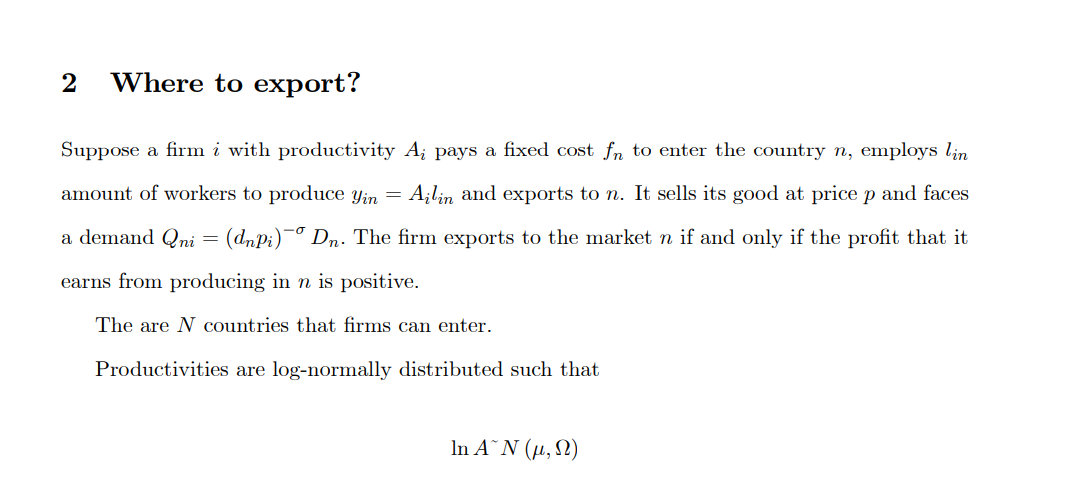

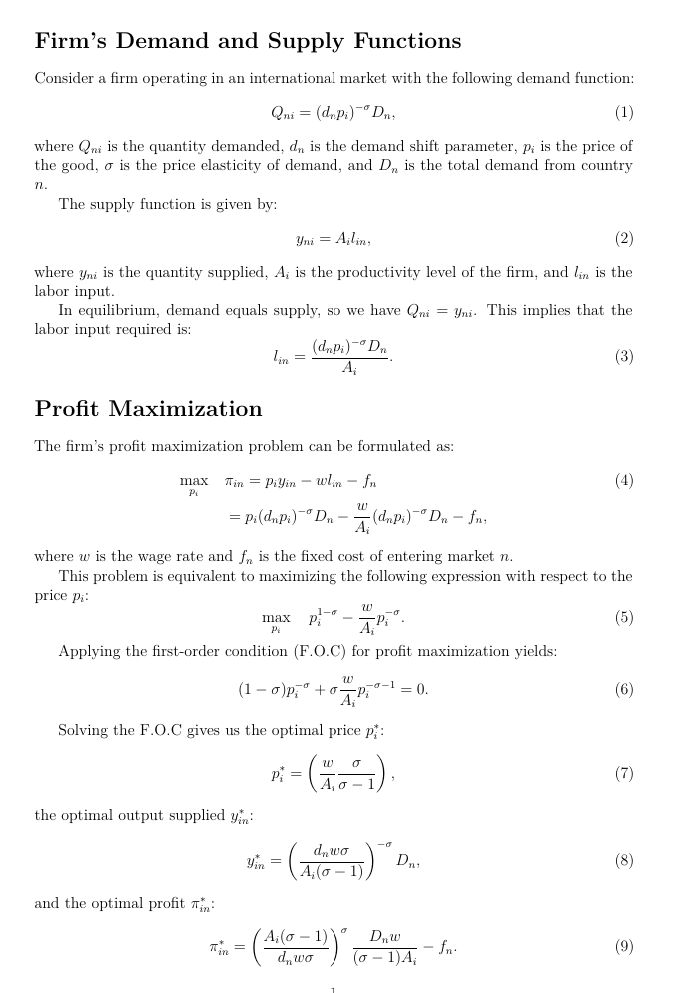

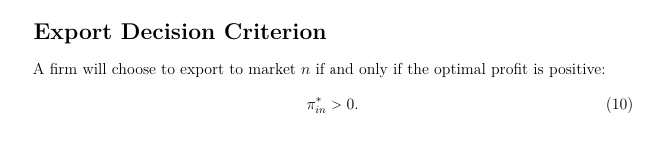

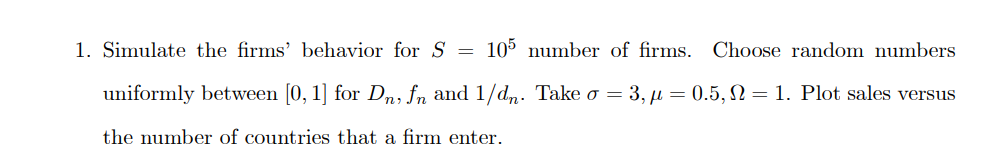

In [220]:
#Required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [221]:
S = 10000 #number of Firms
N = 120 #number of countries
sigma = 3
w = 5
mu = 0.5
omega = 1
A = np.random.lognormal(mu, omega, S)
D_n = np.random.uniform(0, 1, N)
f_n = np.random.uniform(0, 1, N)
inv_d_n = np.random.uniform(0, 1, N)
d_n = 1 / inv_d_n
is_firm_i_exposrter_to_n = np.zeros((S, N))
firm_i_sale_in_n = np.zeros((S, N))
firm_i_total_sale = np.zeros(S)
firm_i_number_country_export = np.zeros(S)
firm_i_labor = np.zeros(S)
firm_mean_labor = np.zeros(S)
firm_var_labor = np.zeros(S)
firm_mean_sale = np.zeros(S)
firm_var_sale = np.zeros(S)

In [205]:
def Price(A, sigma, w): # firm i's price 
    return w * sigma / (A * (sigma - 1))

In [206]:
def Sales(A, sigma, w, d_n, D_n): # firms i's sales in country n
    return  ((A * (sigma - 1)/(d_n * sigma * w)) ** sigma) * D_n

In [207]:
def Profit(A, sigma, w, d_n, D_n, f_n): # firms i's profit in country n 
    return ((A * (sigma - 1)/(d_n * sigma * w)) ** sigma) * (D_n * w / (A * (sigma - 1))) - f_n

In [208]:
def Labor(A, sigma, w, d_n, D_n):
    return  (D_n*(Price(A, sigma, w) * d_n)**(-sigma)) / A

In [222]:
for i in range(S):
    for j in range(N):
        if Profit(A[i], sigma, w, d_n[j], D_n[j], f_n[j]) > 0:
            is_firm_i_exposrter_to_n[i, j] = 1
            firm_i_sale_in_n[i, j] = Sales(A[i], sigma, w, d_n[j], D_n[j])
            firm_i_total_sale[i] =  firm_i_total_sale[i] + firm_i_sale_in_n[i, j]  
            firm_i_labor[i] =  firm_i_labor[i] + Labor(A[i], sigma, w, d_n[j], D_n[j])
    firm_mean_sale[i] = np.mean(firm_i_sale_in_n[i, :])
    firm_var_sale[i] = np.std(firm_i_sale_in_n[i, :])
    firm_mean_labor[i] =  firm_i_labor[i] / N

In [223]:
for s in range(S):
     firm_i_number_country_export[s] =  sum(is_firm_i_exposrter_to_n[s, :])       

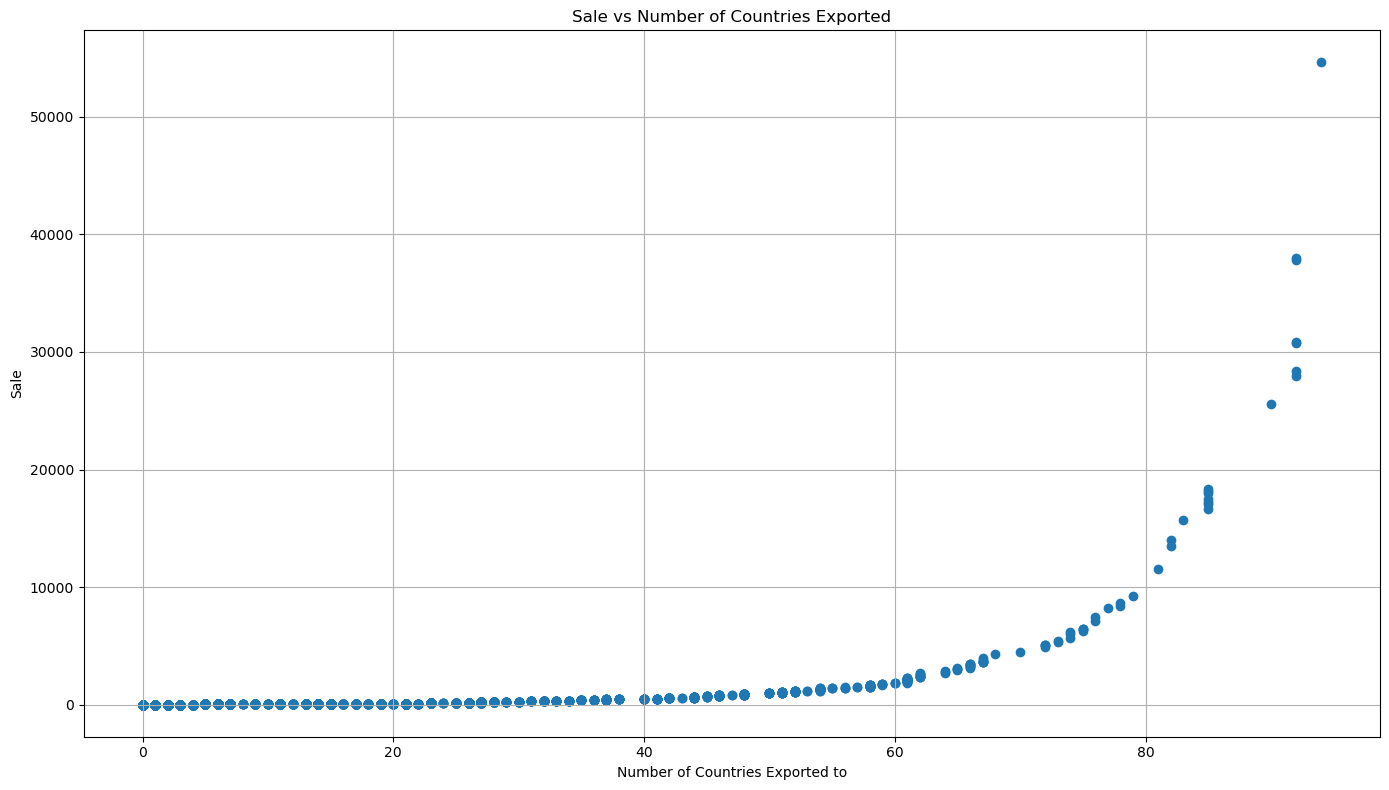

In [185]:
#plotting
plt.figure(figsize=(14, 8))
plt.scatter(firm_i_number_country_export, firm_i_total_sale)
plt.title('Sale vs Number of Countries Exported')
plt.xlabel('Number of Countries Exported to')
plt.ylabel('Sale')
plt.grid(True)
plt.tight_layout()
plt.show()


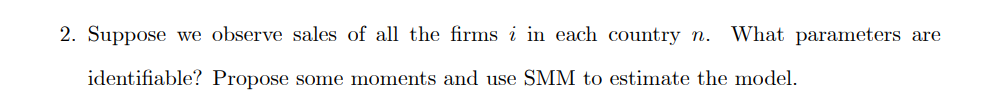

According to $y_{in}$, all parameters: $\sigma$, $\mu$, $\Omega$, and $w$ prompt variation in the sale of firm i in country n. Therefor, all of them are identifiable by utilizing appropriate moments. We need at least 4 moments to estimate these parameters.( if number of moments = 4, the system is just identified)

In [224]:
#calculating data moment 
fraction_over_30 = np.mean(np.sum(is_firm_i_exposrter_to_n, axis=1) > 30)
mean_mean_sales = np.mean(firm_mean_sale)
variance_mean_sales = np.var(firm_mean_sale)
mean_variance_sales = np.mean(firm_var_sale)
variance_variance_sales = np.var(firm_var_sale)
mean_labor = np.mean(firm_mean_labor)
 
observed_moments = {
    'fraction_over_30': fraction_over_30,
    'mean_mean_sales': mean_mean_sales,
    'var_mean_sales': variance_mean_sales,
    'mean_var_sales': variance_mean_sales,
    'var_var_sales': variance_variance_sales,
    'mean_labor': mean_labor,
    
}

for moment_name, moment_value in observed_moments.items():
    print(f"{moment_name}: {moment_value}")


fraction_over_30: 0.0089
mean_mean_sales: 0.08354392480223294
var_mean_sales: 4.27369397838817
mean_var_sales: 4.27369397838817
var_var_sales: 7.975710677711581
mean_labor: 0.0026613040609372004


In [226]:
# Define simulation function that generates moments based on the parameters
def simulate_firms(sigma, mu, omega, w, S=10000, N=120):
    A = np.random.lognormal(mu, sigma, S)
    is_firm_i_exposrter_to_n = np.zeros((S, N))
    firm_i_sale_in_n = np.zeros((S, N))
    firm_i_total_sale = np.zeros(S)
    firm_i_number_country_export = np.zeros(S)
    firm_i_labor = np.zeros(S)
    firm_i_labor_productivity = np.zeros(S)
    for i in range(S):
        for j in range(N):
            if Profit(A[i], sigma, w, d_n[j], D_n[j], f_n[j]) > 0:
                is_firm_i_exposrter_to_n[i, j] = 1
                firm_i_sale_in_n[i, j] = Sales(A[i], sigma, w, d_n[j], D_n[j])
                firm_i_total_sale[i] =  firm_i_total_sale[i] + firm_i_sale_in_n[i, j]  
                firm_i_labor[i] =  firm_i_labor[i] + Labor(A[i], sigma, w, d_n[j], D_n[j])
        
   #calculating data moment 
    fraction_over_30_sim = np.mean(np.sum(is_firm_i_exposrter_to_n, axis=1) > 30)
    mean_mean_sales_sim = np.mean(firm_mean_sale)
    variance_mean_sales_sim = np.var(firm_mean_sale)
    mean_variance_sales_sime = np.mean(firm_var_sale)
    variance_variance_sales_sim = np.var(firm_var_sale)
    mean_labor_sim = np.mean(firm_mean_labor)
  
    simulated_moments = {
    'fraction_over_30': fraction_over_30_sim,
    'mean_mean_sales': mean_mean_sales_sim,
    'var_mean_sales': variance_mean_sales_sim,
    'mean_var_sales': variance_mean_sales_sim,
    'var_var_sales': variance_variance_sales_sim,
    'mean_labor': mean_labor_sim,
    
    }
      
    return simulated_moments

#SMM objective function
def smm_objective(params, observed_moments):
    sigma, mu, omega, w = params
    simulated_moments = simulate_firms(sigma, mu, omega, w)
    moment_diffs_squared = sum((observed_moments[moment] - simulated_moments[moment])**2 for moment in observed_moments)
    return moment_diffs_squared

# Initial parameter guesses (sigma, mu, omega)
initial_guess = [3, 0.5, 1, 5]

# Perform SMM estimation
result = minimize(smm_objective, initial_guess, args=(observed_moments), method='Nelder-Mead')

# Output the results
if result.success:
    estimated_params = result.x
    print(f"Estimated Parameters: sigma={estimated_params[0]}, mu={estimated_params[1]}, omega={estimated_params[2]}, w={estimated_params[3]}")
else:
    print("Optimization failed:", result.message)


Estimated Parameters: sigma=3.39854050235681, mu=0.5376076207480756, omega=1.049861946412238, w=3.7252007542338106


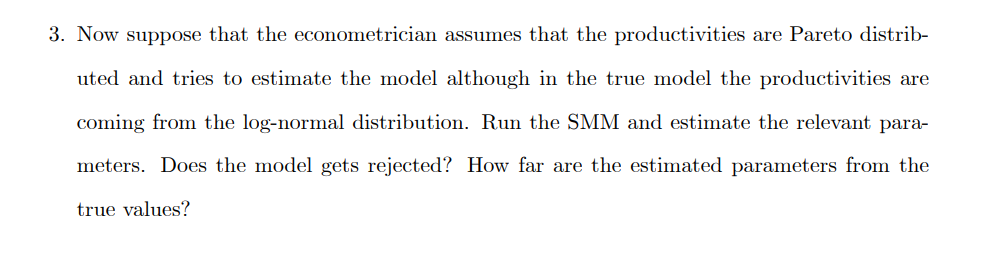

In [233]:
# Define simulation function that generates moments based on the parameters
def simulate_firms_misspecified(sigma, theta, A_bar, w, S=10000, N=120):
   
    is_firm_i_exposrter_to_n = np.zeros((S, N))
    firm_i_sale_in_n = np.zeros((S, N))
    firm_i_total_sale = np.zeros(S)
    firm_i_number_country_export = np.zeros(S)
    firm_i_labor = np.zeros(S)
    firm_i_labor_productivity = np.zeros(S)
    for i in range(S):
        A[i] = (np.random.pareto(theta) + 1) * A_bar
        for j in range(N):
            if Profit(A[i], sigma, w, d_n[j], D_n[j], f_n[j]) > 0:
                is_firm_i_exposrter_to_n[i, j] = 1
                firm_i_sale_in_n[i, j] = Sales(A[i], sigma, w, d_n[j], D_n[j])
                firm_i_total_sale[i] =  firm_i_total_sale[i] + firm_i_sale_in_n[i, j]  
                firm_i_labor[i] =  firm_i_labor[i] + Labor(A[i], sigma, w, d_n[j], D_n[j])
        
   #calculating data moment 
    fraction_over_30_sim = np.mean(np.sum(is_firm_i_exposrter_to_n, axis=1) > 30)
    mean_mean_sales_sim = np.mean(firm_mean_sale)
    variance_mean_sales_sim = np.var(firm_mean_sale)
    mean_variance_sales_sime = np.mean(firm_var_sale)
    variance_variance_sales_sim = np.var(firm_var_sale)
    mean_labor_sim = np.mean(firm_mean_labor)
  
    simulated_moments = {
    'fraction_over_30': fraction_over_30_sim,
    'mean_mean_sales': mean_mean_sales_sim,
    'var_mean_sales': variance_mean_sales_sim,
    'mean_var_sales': variance_mean_sales_sim,
    'var_var_sales': variance_variance_sales_sim,
    'mean_labor': mean_labor_sim,
    
    }
      
    return simulated_moments

#SMM objective function
def smm_objective_misspecified(params, observed_moments):
    sigma, theta, A_bar, w = params
    simulated_moments = simulate_firms_misspecified(sigma, theta, A_bar, w)
    moment_diffs_squared = sum((observed_moments[moment] - simulated_moments[moment])**2 for moment in observed_moments)
    return moment_diffs_squared

# Initial parameter guesses (sigma, mu, omega)
initial_guess = [3, 2, 2, 5]

# Perform SMM estimation
result = minimize(smm_objective_misspecified, initial_guess, args=(observed_moments), method='Nelder-Mead')

# Output the results
if result.success:
    estimated_params_miss = result.x
    print(f"Estimated Parameters: sigma={estimated_params_miss[0]}, theta={estimated_params_miss[1]}, A_bar={estimated_params_miss[2]}, w={estimated_params_miss[3]}")
else:
    print("Optimization failed:", result.message)


Estimated Parameters: sigma=2.6887138366699204, theta=2.0776041030883783, A_bar=2.073964881896972, w=5.208475589752197


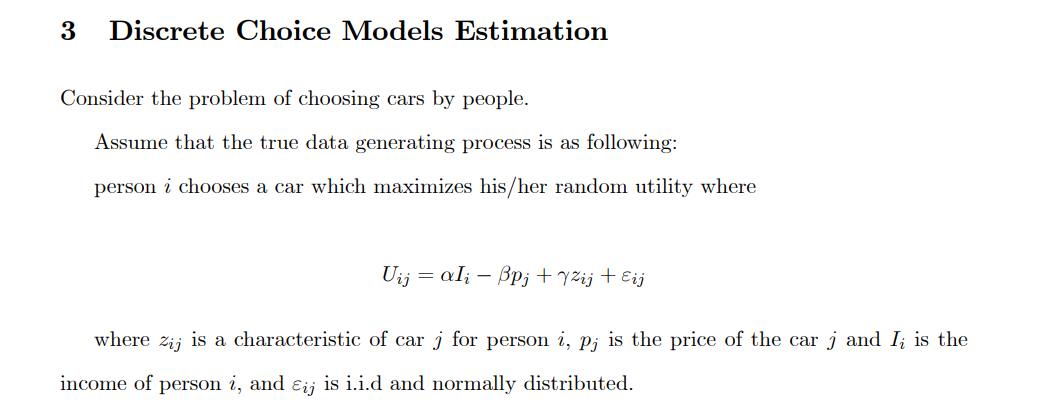

For the sake of simplicity, I assume there are only two choices of cars, indicating with j = 0 and j = 1.

In [1]:
#Required libraries
import numpy as np
import numpy as np
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy.optimize import minimize
from scipy.stats import skew

In [3]:
def Utility(I,p,z,epsi):
    return alpha * I - beta * p + gamma * z + epsi

N=10000
alpha = 5
beta = 10
gamma = 5
mu, sigma = 2, 1
I = np.random.lognormal(mu, sigma, N)
p1 = np.random.uniform(0, 1)
p2 = np.random.uniform(0, 1)
z_1 = np.random.uniform(0, 1, size=N)
z_2 = np.random.uniform(0, 1, size=N)
epsi_1 = np.random.normal(0, 1, size=N)
epsi_2 = np.random.normal(0, 1, size=N)
utility_1 = Utility(I, p1, z_1, epsi_1)
utility_2 = Utility(I, p2, z_2, epsi_2)

In [5]:
# Determine which car is chosen based on utility comparison
chosen_car = np.where(utility_1 < utility_2, 1, 0)

 
print("Chosen cars:", chosen_car)

Chosen cars: [1 0 1 ... 1 1 1]


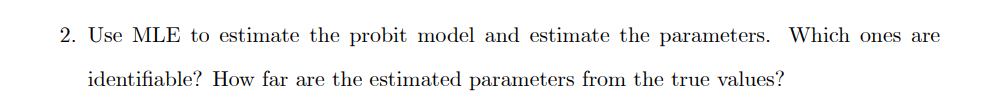

Since I is identical for each person, this term would vanish by substracting utilities, and as a result $\alpha$ is unidentifiable.

In [135]:
data = pd.DataFrame({
    'cars': chosen_car,
    'price': (p2 - p1) * np.ones(N),
    'characteristic': z_2 - z_1
})
# Fit the probit model
X = data[['price', 'characteristic']]
X = sm.add_constant(X)  
y = data['cars']
probit_model = sm.Probit(y, X).fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.365451
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   cars   No. Observations:                10000
Model:                         Probit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:                  0.4328
Time:                        19:50:19   Log-Likelihood:                -3654.5
converged:                       True   LL-Null:                       -6443.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
price             -7.2669      0.192    -37.805      0.000      -7.644      -6.890
characteristic   

In [139]:
estimated_beta_probit = -probit_model.params[0]   
estimated_gamma_probit = probit_model.params[1]

print("Estimated value for β:", estimated_beta_probit)
print("Estimated value for γ:", estimated_gamma_probit)
print("True value for β:", beta)
print("True value for γ:", gamma)

Estimated value for β: 7.266931654259864
Estimated value for γ: 3.5453065804614288
True value for β: 10
True value for γ: 5


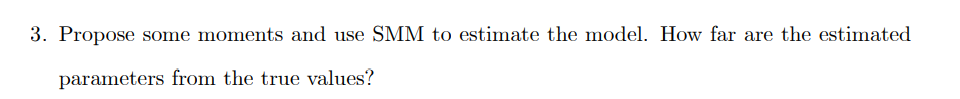

I picked three moments: mean, variance, and skewness as moments.  The estimations are fortunately very close!

In [69]:
#chosen moments: mean and variance and skewness of the data is calculated
data_mean = np.mean(chosen_car)
data_var = np.std(chosen_car)
data_skew = skew(chosen_car)

In [ ]:
epsi_1_simulation = np.random.normal(0, 1, size=N)
epsi_2_simulation = np.random.normal(0, 1, size=N)

In [70]:
def Simulation(beta, gamma):
    chosen_car_simulation = np.zeros(N)
     
 
    for i in range(N):
        if 5*I[i] - beta*p1 + gamma*z_1[i] + epsi_1_simulation[i] < 5*I[i] - beta * p2 + gamma * z_2[i] + epsi_2_simulation[i]:
            chosen_car_simulation[i] = 1
  
    return chosen_car_simulation

def SMM_objective(param):
    beta, gamma = param
    simulated =  Simulation(beta, gamma)
    simualted_mean, simulated_var, simulated_skew = np.mean( simulated),  np.std(simulated), skew(simulated)
    smm = (data_mean - simualted_mean) **2 + (data_var - simulated_var )**2 + (data_skew - simulated_skew)**2
    return smm

# Optimize using SMM
initial_guess = [10, 5]  
result = minimize(SMM_objective, initial_guess, method='Nelder-Mead')
beta_SMM, gamma_SMM = result.x



In [71]:
print("Estimated value for β:", beta_SMM)
print("Estimated value for γ:", gamma_SMM)
print("True value for β:", beta)
print("True value for γ:", gamma)

Estimated value for β: 10.3507080078125
Estimated value for γ: 5.1019287109375
True value for β: 10
True value for γ: 5


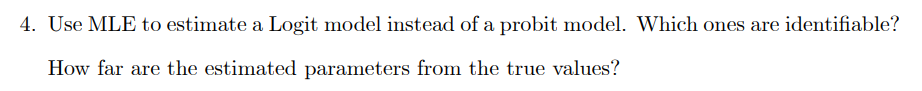

Again, $\alpha$ which is income's coefficient cancels out when estimating probit(in substracted utilities), and as a result is unidentifiable.

In [73]:
Logit_model = sm.Logit(y, X).fit()

# Print estimated parameters
print(Logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.366205
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   cars   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:                  0.4316
Time:                        17:42:47   Log-Likelihood:                -3662.1
converged:                       True   LL-Null:                       -6443.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
price            -12.6417      0.350    -36.072      0.000     -13.329     -11.955
characteristic   

In [74]:
estimated_beta_logit = -Logit_model.params[0]   
estimated_gamma_logit = Logit_model.params[1]

print("Estimated value for β:", estimated_beta_logit)
print("Estimated value for γ:", estimated_gamma_logit)
print("True value for β:", beta)
print("True value for γ:", gamma)

Estimated value for β: 12.641666420278298
Estimated value for γ: 6.205328808440767
True value for β: 10
True value for γ: 5


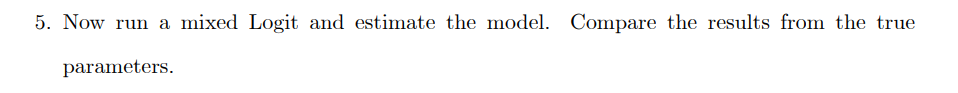

According to Train's book:

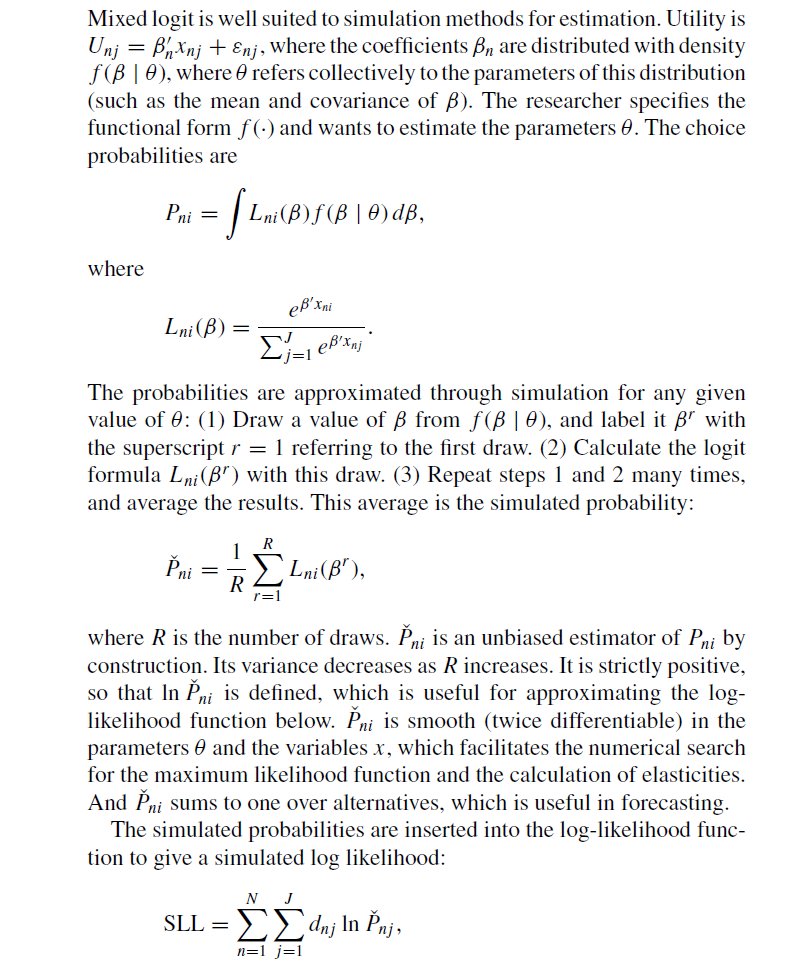

In [6]:
data = pd.DataFrame({
    'cars': chosen_car,
    'price': (p2 - p1) * np.ones(N),
    'characteristic': z_2 - z_1
})
 
y = data['cars']

In [ ]:
R = 1000 # to calcualte Pni
N = 10000 # number of decion makers
normal_standard_beta = np.random.normal(0, 1 , R)
normal_standard_gamma = np.random.normal(0, 1, R)
X1 = data['price']
X2 = data['characteristic']
y = data['cars']

def SLL(param, R, N, normal_standard_beta, normal_standard_gamma, X1, X2, y ):
    mean_beta, sigma_beta, mean_gamma, sigma_gamma = param
    beta = sigma_beta*normal_standard_beta + mean_beta
    gamma = sigma_gamma*normal_standard_gamma + mean_gamma
    sll = 0
    
    for i in range(N):
        L_ni = np.zeros(R)
        for r in range(R):
            L_ni[r] = 1 / (1 + np.exp(-beta[r]*X1[i] -gamma[r]*X2[i]))
            
        P_ni = np.mean(L_ni)
        if y[i]:
            sll += np.log(max(1e-9,P_ni))
        else:
            sll += np.log(max(1e-9,1 - P_ni))
            
    return -sll


 


initial_guess = [0, 5, 0, 5]  
result_mixed_logit = minimize(SLL, initial_guess, args = (R, N, normal_standard_beta, normal_standard_gamma, X1, X2, y), method='Nelder-Mead')
beta_mean_mixed_logit, beta_variance_mixed_logit, gamma_mean_mixed_logit, gamma_variance_mixed_logit = result_mixed_logit.x

print("Estimated value for β mean:", -beta_mean_mixed_logit)
print("Estimated value for γ mean:", gamma_mean_mixed_logit)
print("Estimated value for β variance:", beta_variance_mixed_logit)
print("Estimated value for γ variance:", gamma_variance_mixed_logit)
print("True value for β:", 10)
print("True value for γ:", 5)
    

In [23]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.special import expit as logistic

def SLL(param, R, N, beta_sim, gamma_sim, X1, X2, y):
    mean_beta, sigma_beta, mean_gamma, sigma_gamma = param
    beta = sigma_beta * beta_sim + mean_beta
    gamma = sigma_gamma * gamma_sim + mean_gamma
    
    # Vectorize the computation of probabilities
    utilities = -np.einsum('r,i->ri', beta, X1) - np.einsum('r,i->ri', gamma, X2)
    L_ni = logistic(utilities)
    P_ni = np.mean(L_ni, axis=0)  # Mean over simulations

    # Vectorize the log likelihood calculation
    log_likelihood = np.where(y, np.log(np.maximum(P_ni, 1e-9)), np.log(np.maximum(1 - P_ni, 1e-9)))
    return -np.sum(log_likelihood)
 
# Optimization
initial_guess = [0, 20, 0, 20] 
result_mixed_logit = minimize(SLL, initial_guess, args=(R, N, normal_standard_beta, normal_standard_gamma, X1, X2, y), method='L-BFGS-B', options={'maxiter': 100})

beta_mean_mixed_logit, beta_variance_mixed_logit, gamma_mean_mixed_logit, gamma_variance_mixed_logit = result_mixed_logit.x

print("Estimated value for β mean:", beta_mean_mixed_logit)
print("Estimated value for β variance:", beta_variance_mixed_logit)
print("Estimated value for γ mean:", gamma_mean_mixed_logit)
print("Estimated value for γ variance:", gamma_variance_mixed_logit)


Estimated value for β mean: -33.62359330375036
Estimated value for β variance: 12.557194355074424
Estimated value for γ mean: 16.32768066433113
Estimated value for γ variance: 2.946683481255849


The first code took so long that I tried a more efficient way to see whether it solve the slow convergence or not. The parameters are way far from the true parameters:(

 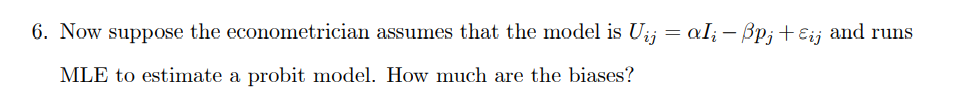

In [128]:
beta = 10
gamma = 5
X2 = data['price']
X2 = sm.add_constant(X2)    
y = data['cars']
probit_model_ommited_variable = sm.Probit(y, X2).fit()
print(probit_model_ommited_variable.summary())

Optimization terminated successfully.
         Current function value: 0.644296
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:                   cars   No. Observations:                10000
Model:                         Probit   Df Residuals:                     9999
Method:                           MLE   Df Model:                            0
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:               2.953e-11
Time:                        19:44:16   Log-Likelihood:                -6443.0
converged:                       True   LL-Null:                       -6443.0
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
price         -4.0487      0.131    -30.914      0.000      -4.305      -3.792


In [129]:
estimated_beta_probit_biased = -probit_model_ommited_variable.params[0]   
print("Estimated value for β:", estimated_beta_probit_biased)
print("True value for β:", beta)
print("Bias for β (β - β'):",  (-estimated_beta_probit_biased + beta))

Estimated value for β: 4.048729720804897
True value for β: 10
Bias for β (β - β'): 5.951270279195103


Since we have a ommited variable, we expected this huge bias in first place!

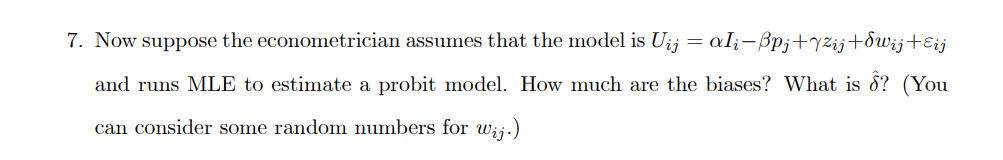

In [131]:
w_1 = np.random.normal(0, 1, N)
w_2 = np.random.normal(0, 1, N)
data2 = pd.DataFrame({
    'cars': chosen_car,
    'price': (p2 - p1) * np.ones(N),
    'characteristic': z_2 - z_1,
    'irrelevent' : w_2 - w_1
})

# Fit the probit model
X3 = data2[['price', 'characteristic', 'irrelevent']]
X3 = sm.add_constant(X3)   
probit_model_irelevent_variable = sm.Probit(y, X3).fit()
print(probit_model_irelevent_variable.summary())

Optimization terminated successfully.
         Current function value: 0.365398
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   cars   No. Observations:                10000
Model:                         Probit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:                  0.4329
Time:                        19:45:42   Log-Likelihood:                -3654.0
converged:                       True   LL-Null:                       -6443.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
price             -7.2682      0.192    -37.802      0.000      -7.645      -6.891
characteristic   

In [143]:
estimated_beta_probit_irrelevent = -probit_model_irelevent_variable.params[0]   
estimated_gamma_probit_irrelevent = probit_model_irelevent_variable.params[1]
estimated_delta_probit_irrelevent = probit_model_irelevent_variable.params[2]
 
print("Bias for β (β - β'):",  (-estimated_beta_probit_irrelevent + estimated_beta_probit))
print("Bias for γ (γ - γ'):",  (-estimated_gamma_probit_irrelevent + estimated_gamma_probit ))
print("Estimated δ:", estimated_delta_probit_irrelevent)

Bias for β (β - β'): -0.0012395460919760737
Bias for γ (γ - γ'): -0.000808790061261444
Estimated δ: -0.012152800413341804


Since w is a irrelevent variable, we expected ot not have an effect on our estimations in the first place.

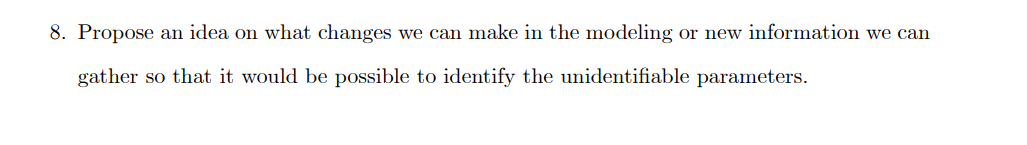

To address the issue of identifying the income coefficient in the binary choice model, I propose the following adjustments:

1. **Interaction Terms**: By incorporating interaction terms between income and other observed variables such as individual characteristics (`z_i,j`) and price (`Pj`), the model can capture how the impact of income on the decision varies depending on these factors. This approach may help in distinguishing the income effect across the two choices.

2. **Nonlinear Income Functions**: Applying nonlinear transformations to income, like logarithmic or polynomial functions, might capture more complex income effects that vary between the choices, thus helping in making the income effects identifiable.
 